In [2]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [5]:
##remove

bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130c1a5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11442cb90>]], dtype=object)

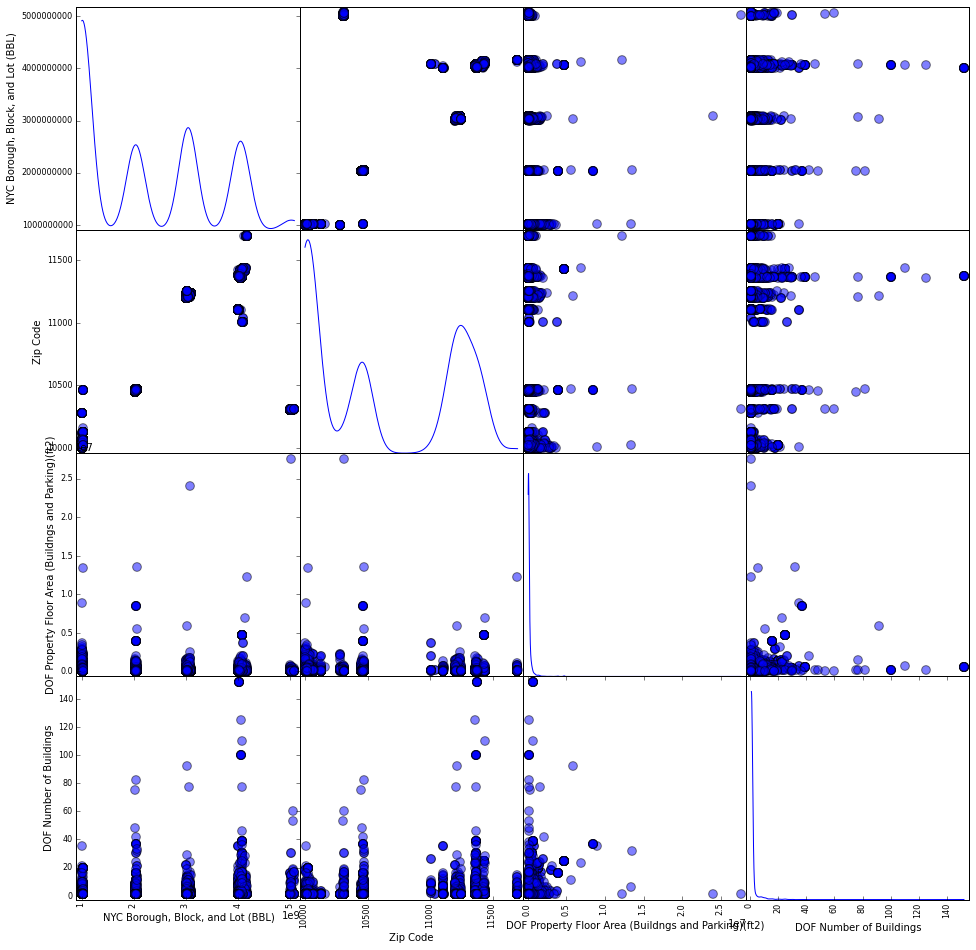

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [7]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [8]:
index_energy = np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])
indx_area = np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'])
nrg['Site EUI(kBtu/ft2)'][~index_energy]=float('NaN')
nrg.loc[~indx_area,'Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'] = float('NaN')

/Users/XS/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'].astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [10]:
#creating BBL column 
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'].astype(float)
#merging the data sets using the BBL
bblnrgdata = pd.merge(nrg, bsize, how = 'inner', on = 'BBL')


/Users/XS/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/Users/XS/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


/Users/XS/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


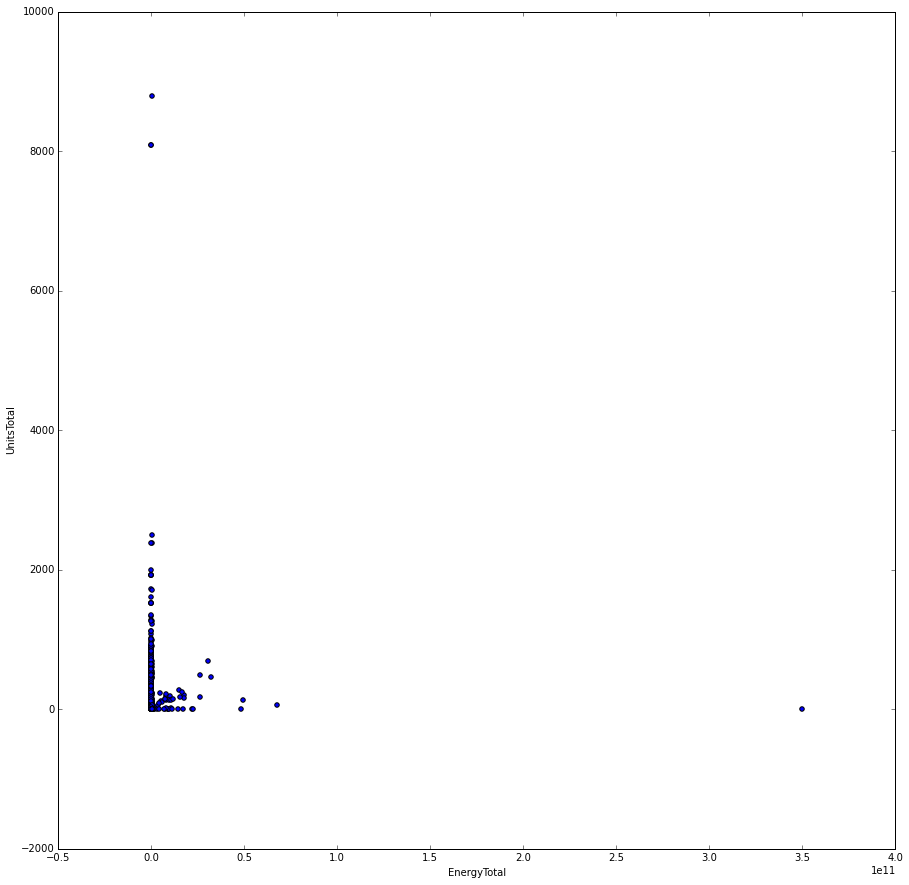

In [11]:
bblnrgdata['EnergyTotal'] = bblnrgdata['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'].astype(float)*bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)
fig = figure(figsize=(15,15))

bblnrgdata.plot(kind='scatter', x='EnergyTotal', y='UnitsTotal', marker='o', figsize=(15, 15))

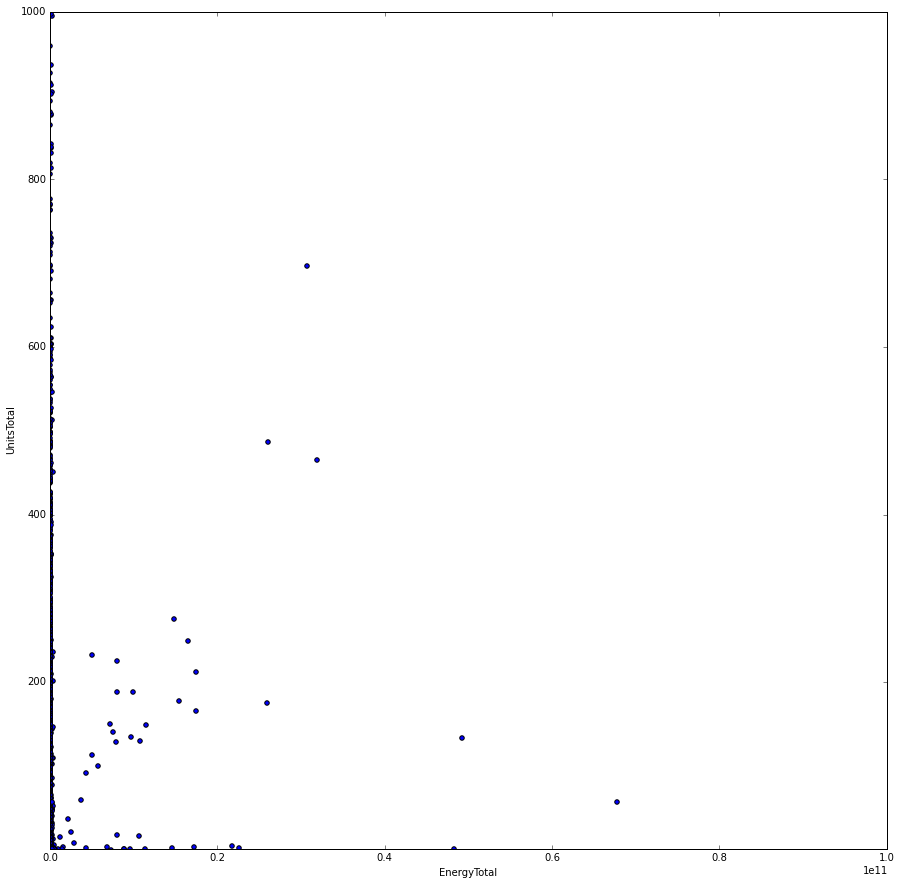

In [12]:
bblnrgdata.plot(kind='scatter', x='EnergyTotal', y='UnitsTotal', marker='o', figsize=(15, 15),  xlim=(1000,1e11), ylim=(1,1000))

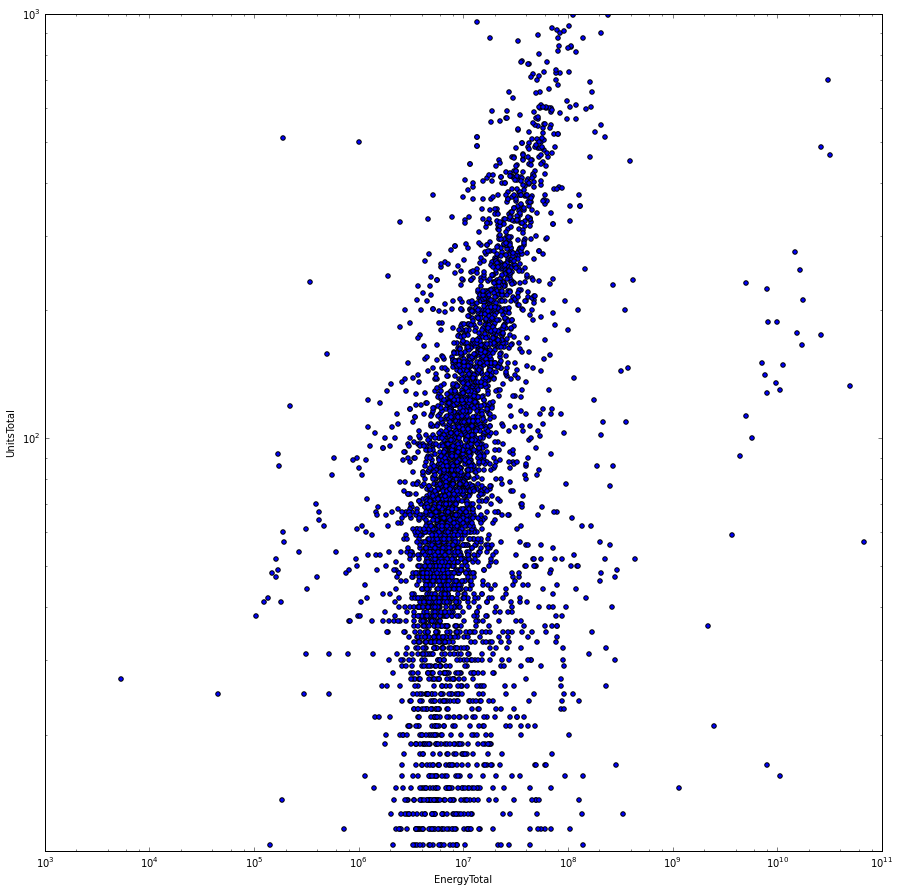

In [13]:
bblnrgdata_cut=bblnrgdata[(bblnrgdata.EnergyTotal>1000) & (bblnrgdata.EnergyTotal<1e11) & (bblnrgdata.UnitsTotal>10) & (bblnrgdata.UnitsTotal<1000)]
bblnrgdata_cut.plot(kind='scatter',x='EnergyTotal',y='UnitsTotal', marker='o', figsize=(15, 15),  xlim=(1000,1e11), ylim=(0,1000), loglog=True)

In [14]:
#X = sm.add_constant(np.log10(x))
#print X
#model = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN
#fit = model.fit()
#return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

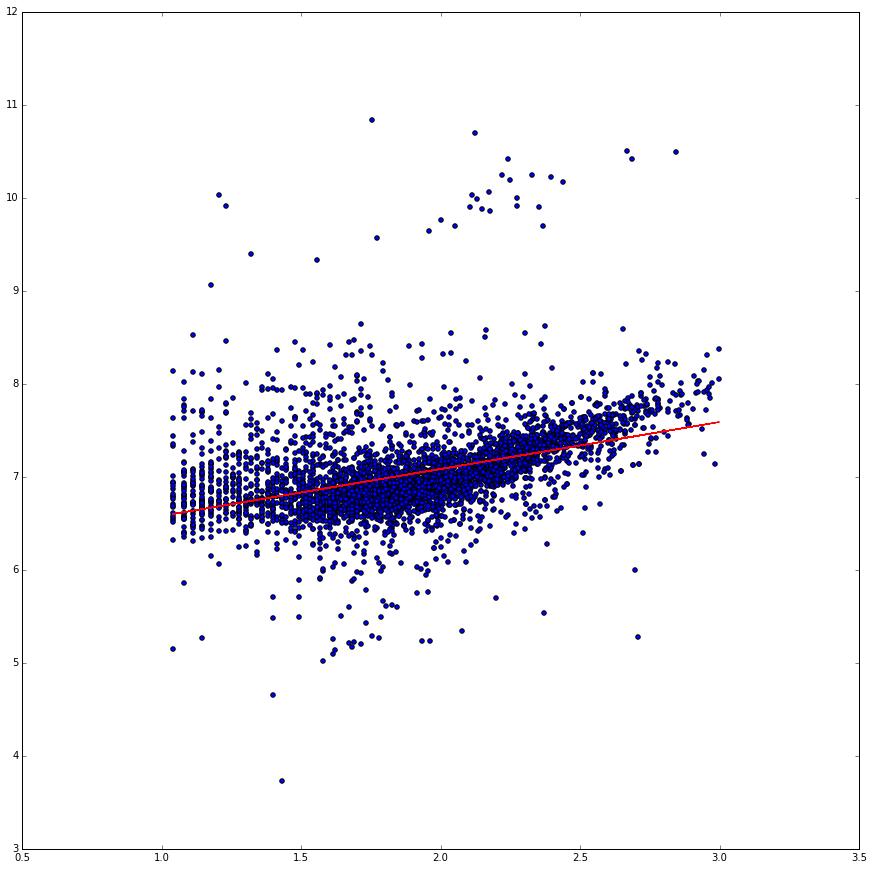

In [15]:
import statsmodels.formula.api as smf
data = pd.DataFrame({'EnergyTotalLog':np.log10(bblnrgdata_cut.EnergyTotal),
                  'UnitsTotalLog':np.log10(bblnrgdata_cut.UnitsTotal)})
model1 = smf.ols('EnergyTotalLog ~ UnitsTotalLog', data=data).fit()
pl.figure(figsize=(15,15))
pl.scatter(data.UnitsTotalLog, data.EnergyTotalLog)
plot(data.UnitsTotalLog, model1.predict(),'r')

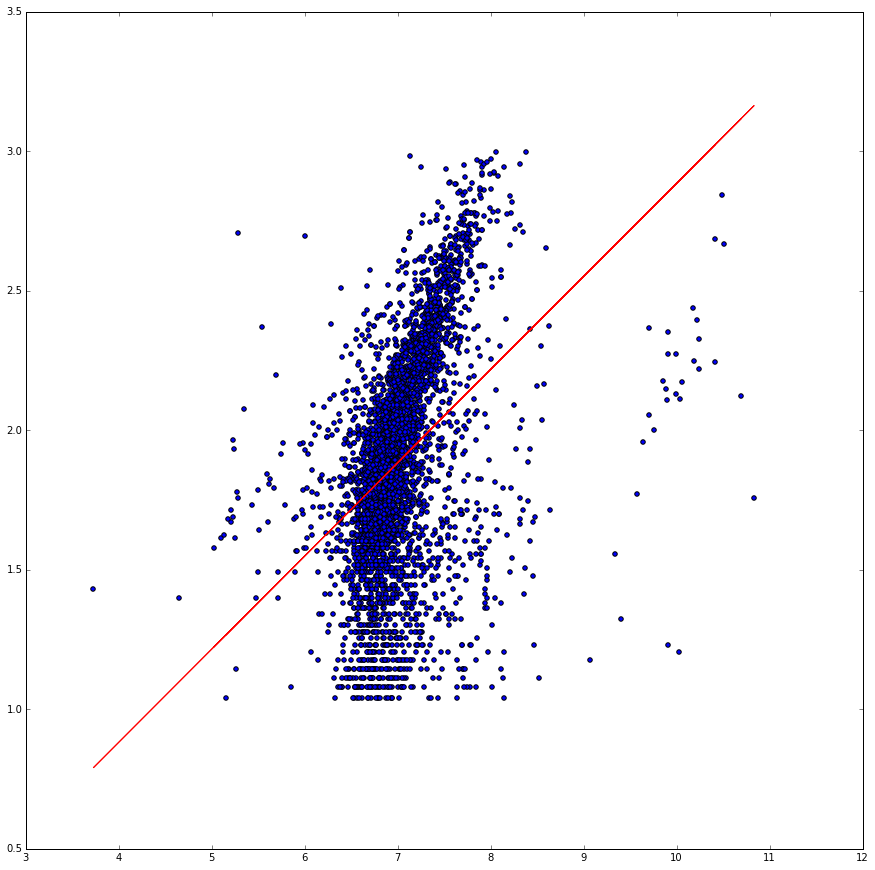

In [16]:
model2 = smf.ols('UnitsTotalLog ~ EnergyTotalLog', data=data).fit()
pl.figure(figsize=(15,15))
pl.scatter(data.EnergyTotalLog, data.UnitsTotalLog)
plot(data.EnergyTotalLog, model2.predict(),'r')

In [ ]:
#model1, which is log energy total against log units total, looks better based on the graph

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         EnergyTotalLog   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     855.4
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          2.32e-171
Time:                        13:04:28   Log-Likelihood:                -2505.7
No. Observations:                4216   AIC:                             5015.
Df Residuals:                    4214   BIC:                             5028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         6.0738      0.033    181.834      0.000         6.008     6.139
UnitsTotalLog     0.5052      0.017     29.247      0.000         0.471     0.539
==============================================================================
Omnibus:                     2250.486   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45906.676
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      18.613   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UnitsTotalLog   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     855.4
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          2.32e-171
Time:                        13:05:16   Log-Likelihood:                -1633.6
No. Observations:                4216   AIC:                             3271.
Df Residuals:                    4214   BIC:                             3284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.4544      0.080     -5.646      0.000        -0.612    -0.297
EnergyTotalLog     0.3340      0.011     29.247      0.000         0.312     0.356
==============================================================================
Omnibus:                      147.275   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.558
Skew:                          -0.457   Prob(JB):                     3.05e-36
Kurtosis:                       3.309   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#still model1 looks a little better than model2 based on the OLS results. we cannot do likelihood ratio test here because the 
#two models are just switching dependent and independent variables 

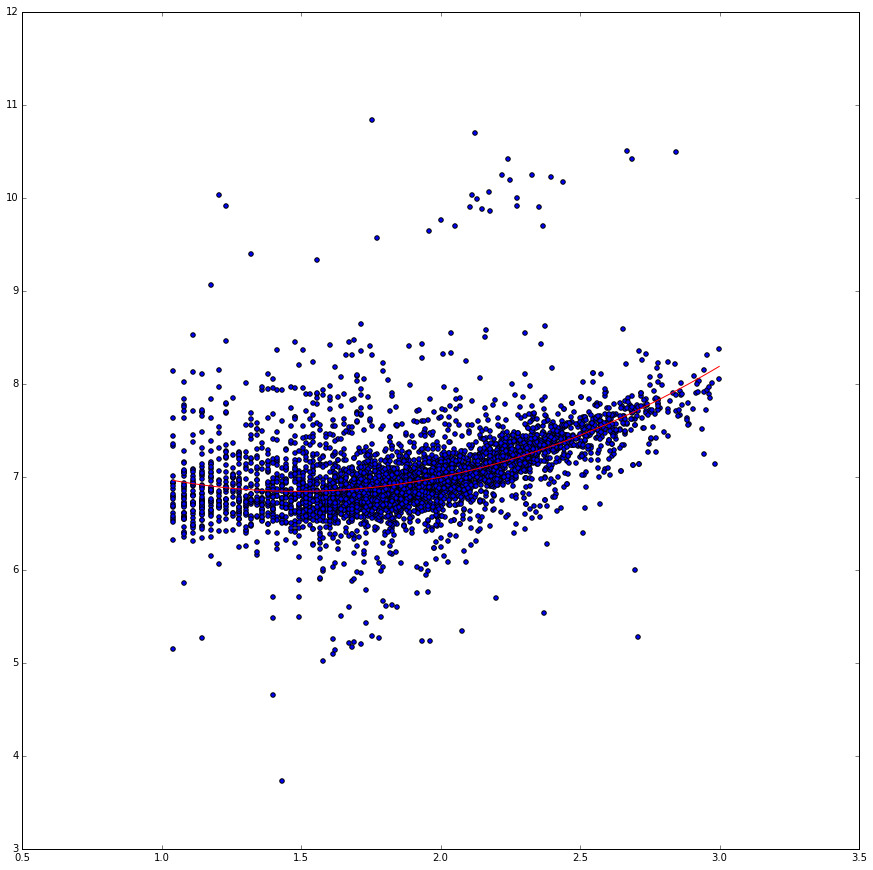

In [19]:
model3 = smf.ols('EnergyTotalLog ~ 1+UnitsTotalLog+I(UnitsTotalLog**2.0)', data=data).fit()
pl.figure(figsize=(15,15))
pl.scatter(data.UnitsTotalLog, data.EnergyTotalLog)
x= pd.DataFrame({'UnitsTotalLog': np.linspace(data.UnitsTotalLog.min(), data.UnitsTotalLog.max(), 100)})
plot(x, model3.predict(x), 'r')

In [20]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         EnergyTotalLog   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     630.2
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          3.69e-240
Time:                        13:12:54   Log-Likelihood:                -2343.6
No. Observations:                4216   AIC:                             4693.
Df Residuals:                    4213   BIC:                             4712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   8.1473      0.117     69.360      0.000         7.917     8.378
UnitsTotalLog              -1.7520      0.124    -14.117      0.000        -1.995    -1.509
I(UnitsTotalLog ** 2.0)     0.5886      0.032     18.353      0.000         0.526     0.652
==============================================================================
Omnibus:                     2391.334   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60236.160
Skew:                           2.210   Prob(JB):                         0.00
Kurtosis:                      20.982   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#model3 is better than model1 and model2 since it fit well with the data and has higher R2